# Neccessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
from statsmodels.tsa.stattools import grangercausalitytests

# import os
# os.system("pip install yfinance")
# os.system("pip install mplfinance")

# ADF Test

In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic  : %f' % result[0])
    print('p-value        : %f' % result[1])

# Question 1

In [3]:
stocks = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'XRP-USD', 
          'DOGE-USD', 'SOL-USD', 'MATIC-USD', 'DOT-USD', 'LTC-USD']

stockPrices = {}

for coin in stocks:
  tickerSymbol = coin

  tickerData = yf.Ticker(tickerSymbol)

  tickerDf = tickerData.history(period='1d',
                                start='2022-5-1',
                                end='2023-5-1')

  tickerDf = tickerDf[['Close']]
  stockPrices[coin] = tickerDf

# Perform ADF Test

In [4]:
for item in stockPrices:
  print(item)
  perform_adf_test(stockPrices[item])
  
  print('************************')

BTC-USD
ADF Statistic  : -3.067787
p-value        : 0.029031
************************
ETH-USD
ADF Statistic  : -3.842179
p-value        : 0.002504
************************
ADA-USD
ADF Statistic  : -1.992827
p-value        : 0.289727
************************
BNB-USD
ADF Statistic  : -3.539037
p-value        : 0.007039
************************
XRP-USD
ADF Statistic  : -3.473428
p-value        : 0.008696
************************
DOGE-USD
ADF Statistic  : -2.886796
p-value        : 0.046905
************************
SOL-USD
ADF Statistic  : -2.429222
p-value        : 0.133658
************************
MATIC-USD
ADF Statistic  : -2.014350
p-value        : 0.280317
************************
DOT-USD
ADF Statistic  : -4.811763
p-value        : 0.000052
************************
LTC-USD
ADF Statistic  : -2.077920
p-value        : 0.253485
************************


# Question 2

In [ ]:
correlations = {} 

for item1 in stockPrices :
    for item2 in stockPrices :
      temp_key = item2  + ' ' + item1

      if item1 == item2 or temp_key in correlations.keys():
        continue

      key = item1 + ' ' + item2

      correlations[key] = stockPrices[item1]['Close'].corr(stockPrices[item2]['Close'])
      

sortedCorrelations = sorted(correlations.items() , key = lambda x:x[1])

for item in sortedCorrelations:
  print(item)

('SOL-USD MATIC-USD', -0.2469871971623345)
('ADA-USD MATIC-USD', -0.23699229533192828)
('SOL-USD LTC-USD', -0.1833382886371221)
('ADA-USD LTC-USD', -0.15061645345242108)
('MATIC-USD DOT-USD', -0.13314413726578114)
('DOT-USD LTC-USD', 0.0054583098478443014)
('ADA-USD DOGE-USD', 0.14961791603862534)
('DOGE-USD SOL-USD', 0.17619754414235214)
('BTC-USD MATIC-USD', 0.2070023938592951)
('ADA-USD XRP-USD', 0.255200956830248)
('BNB-USD SOL-USD', 0.2612212265056539)
('ADA-USD BNB-USD', 0.2798467990960935)
('XRP-USD SOL-USD', 0.2963764347955064)
('XRP-USD DOT-USD', 0.30009606731865585)
('DOGE-USD DOT-USD', 0.31668943738515465)
('BTC-USD DOGE-USD', 0.36882474446336916)
('XRP-USD MATIC-USD', 0.37006423297321267)
('XRP-USD LTC-USD', 0.39655451244364714)
('ETH-USD MATIC-USD', 0.40158820813889745)
('BNB-USD DOT-USD', 0.40398277214875267)
('DOGE-USD MATIC-USD', 0.4119221613511625)
('BTC-USD LTC-USD', 0.45268992797476154)
('XRP-USD DOGE-USD', 0.4743815538537696)
('ETH-USD DOGE-USD', 0.5007975675175778)

# Question 3

>>>>>> Very Low Prices

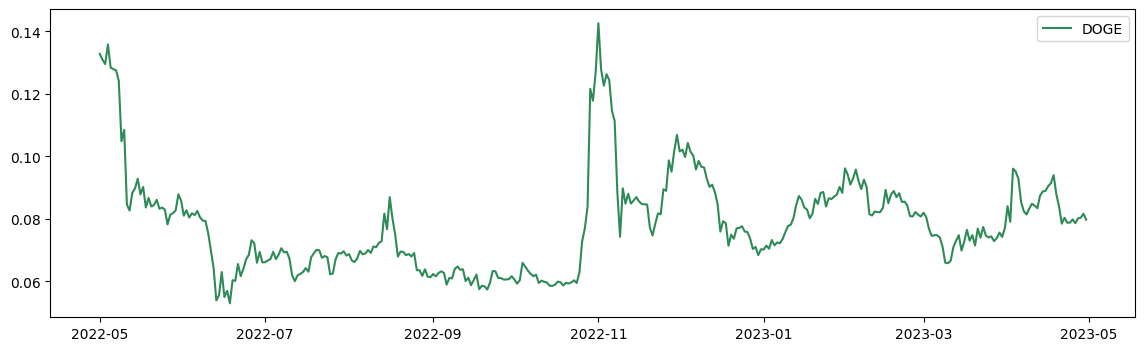

In [ ]:
DOGE = stockPrices['DOGE-USD']

plt.figure(figsize = (14 , 4))

plt.plot(DOGE , color = 'seagreen')
plt.legend(['DOGE'] , fontsize = 10)
plt.savefig('DOGE.png')

>>>>>> Low Prices

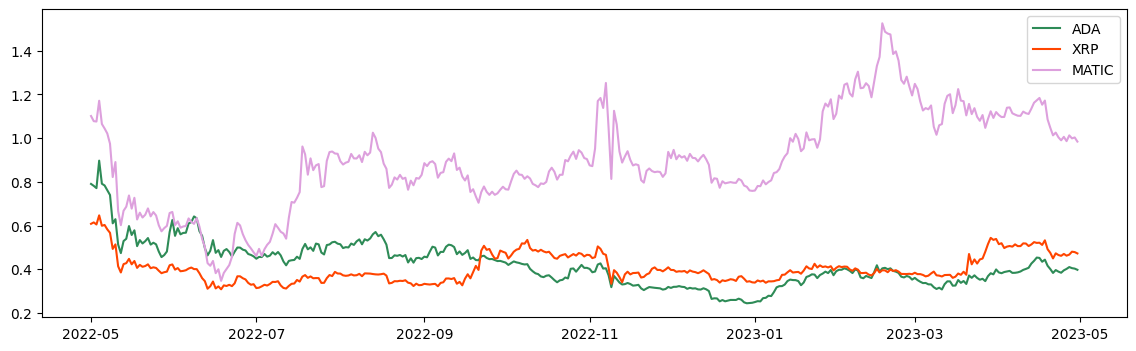

In [ ]:
import pandas as pd

plt.figure(figsize = (14 , 4))

# BTC = stockPrices['BTC-USD']
XRP = stockPrices['XRP-USD']
ADA = stockPrices['ADA-USD']
DOGE = stockPrices['DOGE-USD']
MATIC = stockPrices['MATIC-USD']



# plt.plot(BTC , color = 'blue')
plt.plot(ADA , color = 'seagreen')
plt.plot(XRP , color = 'orangered')
plt.plot(MATIC , color = 'plum')


plt.legend([ 'ADA' ,  'XRP' , 'MATIC' ] , fontsize = 10)

plt.savefig('ADA-XRP-MATIC.png')

# ts_df = pd.DataFrame(columns=['ADA', 'XRP'] 
#                      , data=zip(ADA , XRP ))

# gc_res = grangercausalitytests(ts_df, 10)

>>>>>> Medium Prices

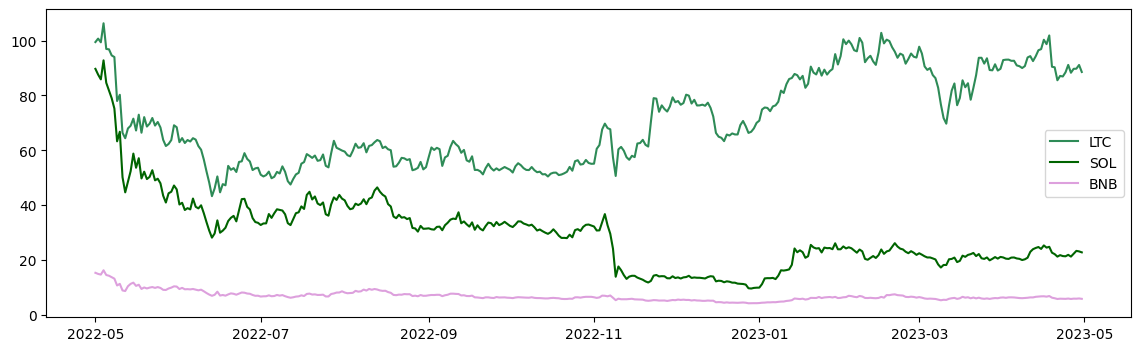

In [ ]:
plt.figure(figsize = (14 , 4))

LTC = stockPrices['LTC-USD']
SOL = stockPrices['SOL-USD']
# BNB = stockPrices['BNB-USD']
DOT = stockPrices['DOT-USD']





# plt.plot(BTC , color = 'blue')
plt.plot(LTC , color = 'seagreen')
plt.plot(SOL , color = 'darkgreen')
# plt.plot(BNB , color = 'goldenrod')
plt.plot(DOT , color = 'plum')

# 
plt.legend([ 'LTC' ,  'SOL' , 'BNB' , 'DOT' ] , fontsize = 10)
plt.savefig('LTC-SOL-BNB-DOT.png')
# plt.legend()

>>>>>> High Prices

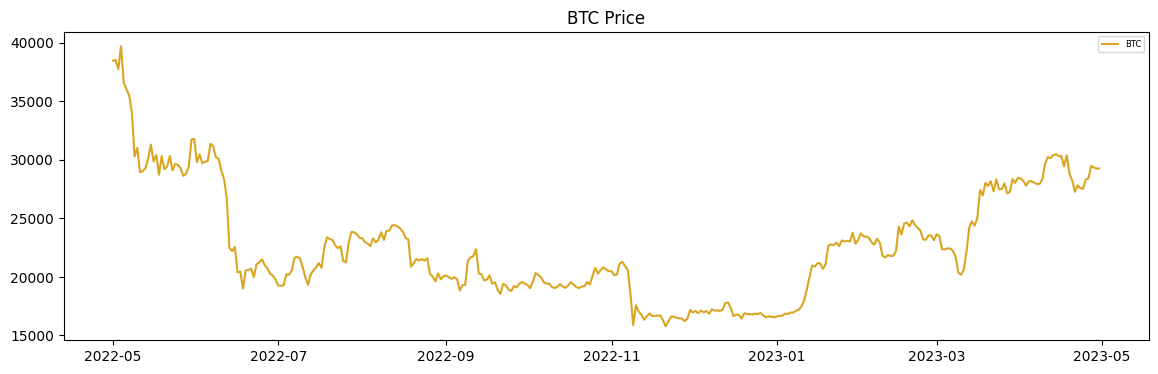

In [ ]:
plt.figure(figsize = (14 , 4))

BTC = stockPrices['BTC-USD']
# ETH = stockPrices['ETH-USD']

plt.plot(BTC , color = 'goldenrod')
# plt.plot(ETH , color = 'plum')

plt.title('BTC Price')
plt.legend(['BTC' ] , fontsize = 6)

plt.savefig('BTC.png')
# plt.save()

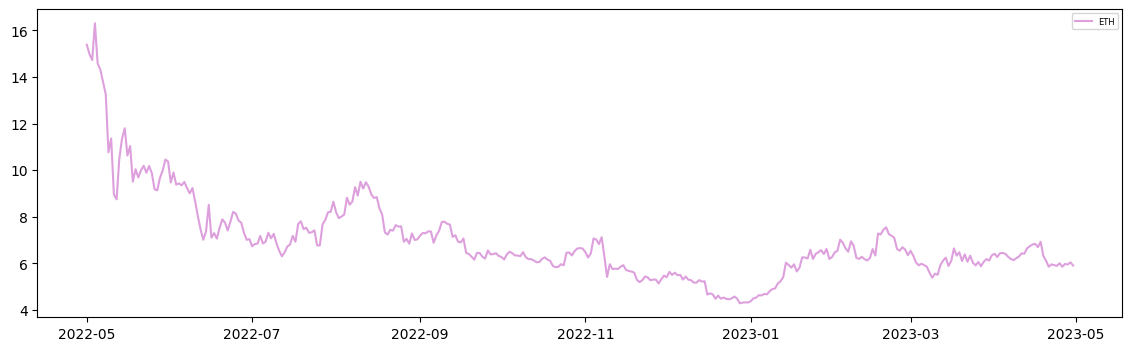

In [ ]:
plt.figure(figsize = (14 , 4))

ETH = stockPrices['ETH-USD']

plt.plot(DOT , color = 'plum')

plt.legend(['ETH' , 'BTC' ] , fontsize = 6)

plt.savefig('ETH.png')

>>> # Assigning Close Prices

In [ ]:
XRP = stockPrices['XRP-USD']['Close']
ADA = stockPrices['ADA-USD']['Close']
DOGE = stockPrices['DOGE-USD']['Close']
MATIC = stockPrices['MATIC-USD']['Close']

LTC = stockPrices['LTC-USD']['Close']
SOL = stockPrices['SOL-USD']['Close']
BNB = stockPrices['BNB-USD']['Close']
DOT = stockPrices['DOT-USD']['Close']

BTC = stockPrices['BTC-USD']['Close']
ETH = stockPrices['ETH-USD']['Close']

ClosePrices = {
  "XRP"    :  XRP ,
  "ADA"    :  ADA ,
  "DOGE"   :  DOGE ,
  "MATIC"  :  MATIC ,
  "LTC"    :  LTC ,
  "SOL"    :  SOL ,
  "BNB"    :  BNB ,  
  "DOT"    :  DOT ,
  "BTC"    :  BTC ,
  "ETH"    :  ETH
}

#grangers_causation_matrix

In [ ]:
grangers_analysis = {}
maxlag = 10

for item1 in ClosePrices:
  for item2 in ClosePrices :
    temp_key = item2 + '_with_' + item1
    
    if temp_key in grangers_analysis.keys() or item1 == item2:
      continue

    ts_df = pd.DataFrame(columns=[item1 , item2],
                        data = zip( ClosePrices[item1] , ClosePrices[item2] ))

    key = item1 + '  ' + item2
    primary_analysis = grangercausalitytests(ts_df , maxlag = 10)
    

    grangers_analysis[key] = grangercausalitytests(ts_df , maxlag = 10)

    minimum = 1
    minimum_index = 0

    for i in range(maxlag):
      if primary_analysis[i+1][0]['ssr_chi2test'][1] < minimum :
        minimum = primary_analysis[i+1][0]['ssr_chi2test'][1]
        minimum_index = i
    

    grangers_analysis[key] = (minimum , minimum_index)

Streaming output truncated to the last 5000 lines.
likelihood ratio test: chi2=4.0415  , p=0.6711  , df=6
parameter F test:         F=0.6529  , p=0.6878  , df_denom=346, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.5443  , p=0.8007  , df_denom=343, df_num=7
ssr based chi2 test:   chi2=3.9765  , p=0.7825  , df=7
likelihood ratio test: chi2=3.9546  , p=0.7850  , df=7
parameter F test:         F=0.5443  , p=0.8007  , df_denom=343, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.6295  , p=0.7530  , df_denom=340, df_num=8
ssr based chi2 test:   chi2=5.2876  , p=0.7264  , df=8
likelihood ratio test: chi2=5.2488  , p=0.7307  , df=8
parameter F test:         F=0.6295  , p=0.7530  , df_denom=340, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.6834  , p=0.7240  , df_denom=337, df_num=9
ssr based chi2 test:   chi2=6.4971  , p=0.6893  , df=9
likelihood ratio test: chi2=6.4385  , p=0.6

In [ ]:
grangers_analysis

{'XRP  ADA': (0.016570108731243476, 1),
 'XRP  DOGE': (0.0003069373432526986, 9),
 'XRP  MATIC': (0.008268149085654644, 2),
 'XRP  LTC': (0.44004281719560523, 2),
 'XRP  SOL': (0.0005389113095701734, 9),
 'XRP  BNB': (0.41509675812782454, 3),
 'XRP  DOT': (0.0052881075728572185, 3),
 'XRP  BTC': (0.4109282927751162, 3),
 'XRP  ETH': (0.040700554688243795, 7),
 'ADA  XRP': (0.0320556950417781, 3),
 'ADA  DOGE': (0.0002158727141667727, 3),
 'ADA  MATIC': (0.00024885644192572853, 7),
 'ADA  LTC': (0.03566200957282385, 6),
 'ADA  SOL': (9.271856649840333e-06, 5),
 'ADA  BNB': (0.002258342687504573, 6),
 'ADA  DOT': (0.005789261897045731, 5),
 'ADA  BTC': (0.0002612881621802383, 7),
 'ADA  ETH': (1.4944381740447393e-05, 7),
 'DOGE  XRP': (0.09650228192641533, 3),
 'DOGE  ADA': (0.00018758041047045463, 6),
 'DOGE  MATIC': (0.08357139026494807, 2),
 'DOGE  LTC': (0.1690135496648403, 3),
 'DOGE  SOL': (0.0013331550223704299, 7),
 'DOGE  BNB': (0.3650327935946086, 5),
 'DOGE  DOT': (0.004635567